# 앙상블 학습(Ensemble Learning)
---
**앙상블 학습**(Ensemble Learning): 여러 분류기를 하나의 메타 분류기로 연결하여 개별 분류기보다 더 좋은 일반화 성능을 달성하는 것이 목표

**앙상블 방법**
- **과반수 투표**(Majority Voting): 분류기의 과반수가 예측한 클래스 레이블을 선택하는 단순한 방법, <U>이진 클래스 분류 문제</U>
- **다수결 투표**(Plurality Voting): 가장 많은 투표(최빈값)를 받은 클래스 레이블 선택하는 방법(일반화), <U>다중 클래스 분류 문제</U>

# 다중 분류(Multiclass Classification) 실습
---
**데이터셋**: iris(붓꽃 데이터셋)
- Iris-setosa, Iris-versicolor, Iris-virginica 세 종류 150개의 붓꽃 샘플

**다중 분류**(Multiclass Classification)

**앙상블 학습**(Ensemble Learning)

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import myutils as my

### 데이터 준비 & 전처리

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# 결측치 확인
df.isna().sum(axis=0)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
# 중복치 확인
df.duplicated().sum()

1

- X, y 나누기

In [ ]:
X = df.drop(['target'], axis=1)
y = df['target']

- train, test 나누기

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


### 표준화(Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_train_s[:5]

array([[-1.72156775, -0.33210111, -1.34572231, -1.32327558],
       [-1.12449223, -1.22765467,  0.41450518,  0.6517626 ],
       [ 1.14439475, -0.5559895 ,  0.58484978,  0.25675496],
       [-1.12449223,  0.11567567, -1.28894078, -1.45494479],
       [-0.40800161, -1.22765467,  0.13059752,  0.12508575]])

In [ ]:
y_train = y_train.values

In [ ]:
print(type(X_train_s), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### 학습
`VotingClassifier`: 다수결 투표 앙상블 분류기, 서로 다른 알고리즘을 가진 분류기가 같은 데이터셋을 기반으로 학습되고 결합

**Voting 유형**: Hard Voting, Soft Voting

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
clf1 = KNeighborsClassifier()
clf2 = SVC()
clf3 = DecisionTreeClassifier()

clf = VotingClassifier(
    estimators=[('knn', clf1),
                ('svc', clf2),
                ('tree', clf3)],
                voting = 'hard',
                weights=[1, 1, 1]
)
clf.fit(X_train_s, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()), ('svc', SVC()),
                             ('tree', DecisionTreeClassifier())],
                 weights=[1, 1, 1])

### 평가

In [ ]:
clf.score(X_train_s, y_train)

0.9833333333333333

### 예측

In [ ]:
X_test_s = scaler.transform(X_test)
y_test = y_test.values

In [ ]:
y_pred = clf.predict(X_test_s)
y_pred[:5]

array([0, 2, 1, 1, 0])

- **성능 평가**

In [ ]:
my.print_score(y_test, y_pred, average='macro')

accuracy: 0.9666666666666667
precision: 0.9696969696969697
recall: 0.9666666666666667


- **혼동 행렬**(confusion matrix)

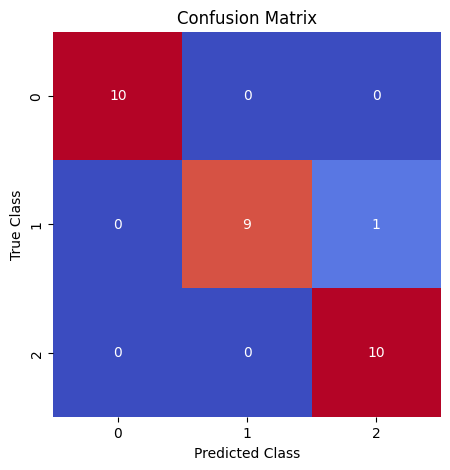

In [ ]:
my.plot_confusion_matrix(y_test, y_pred)